![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [19]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


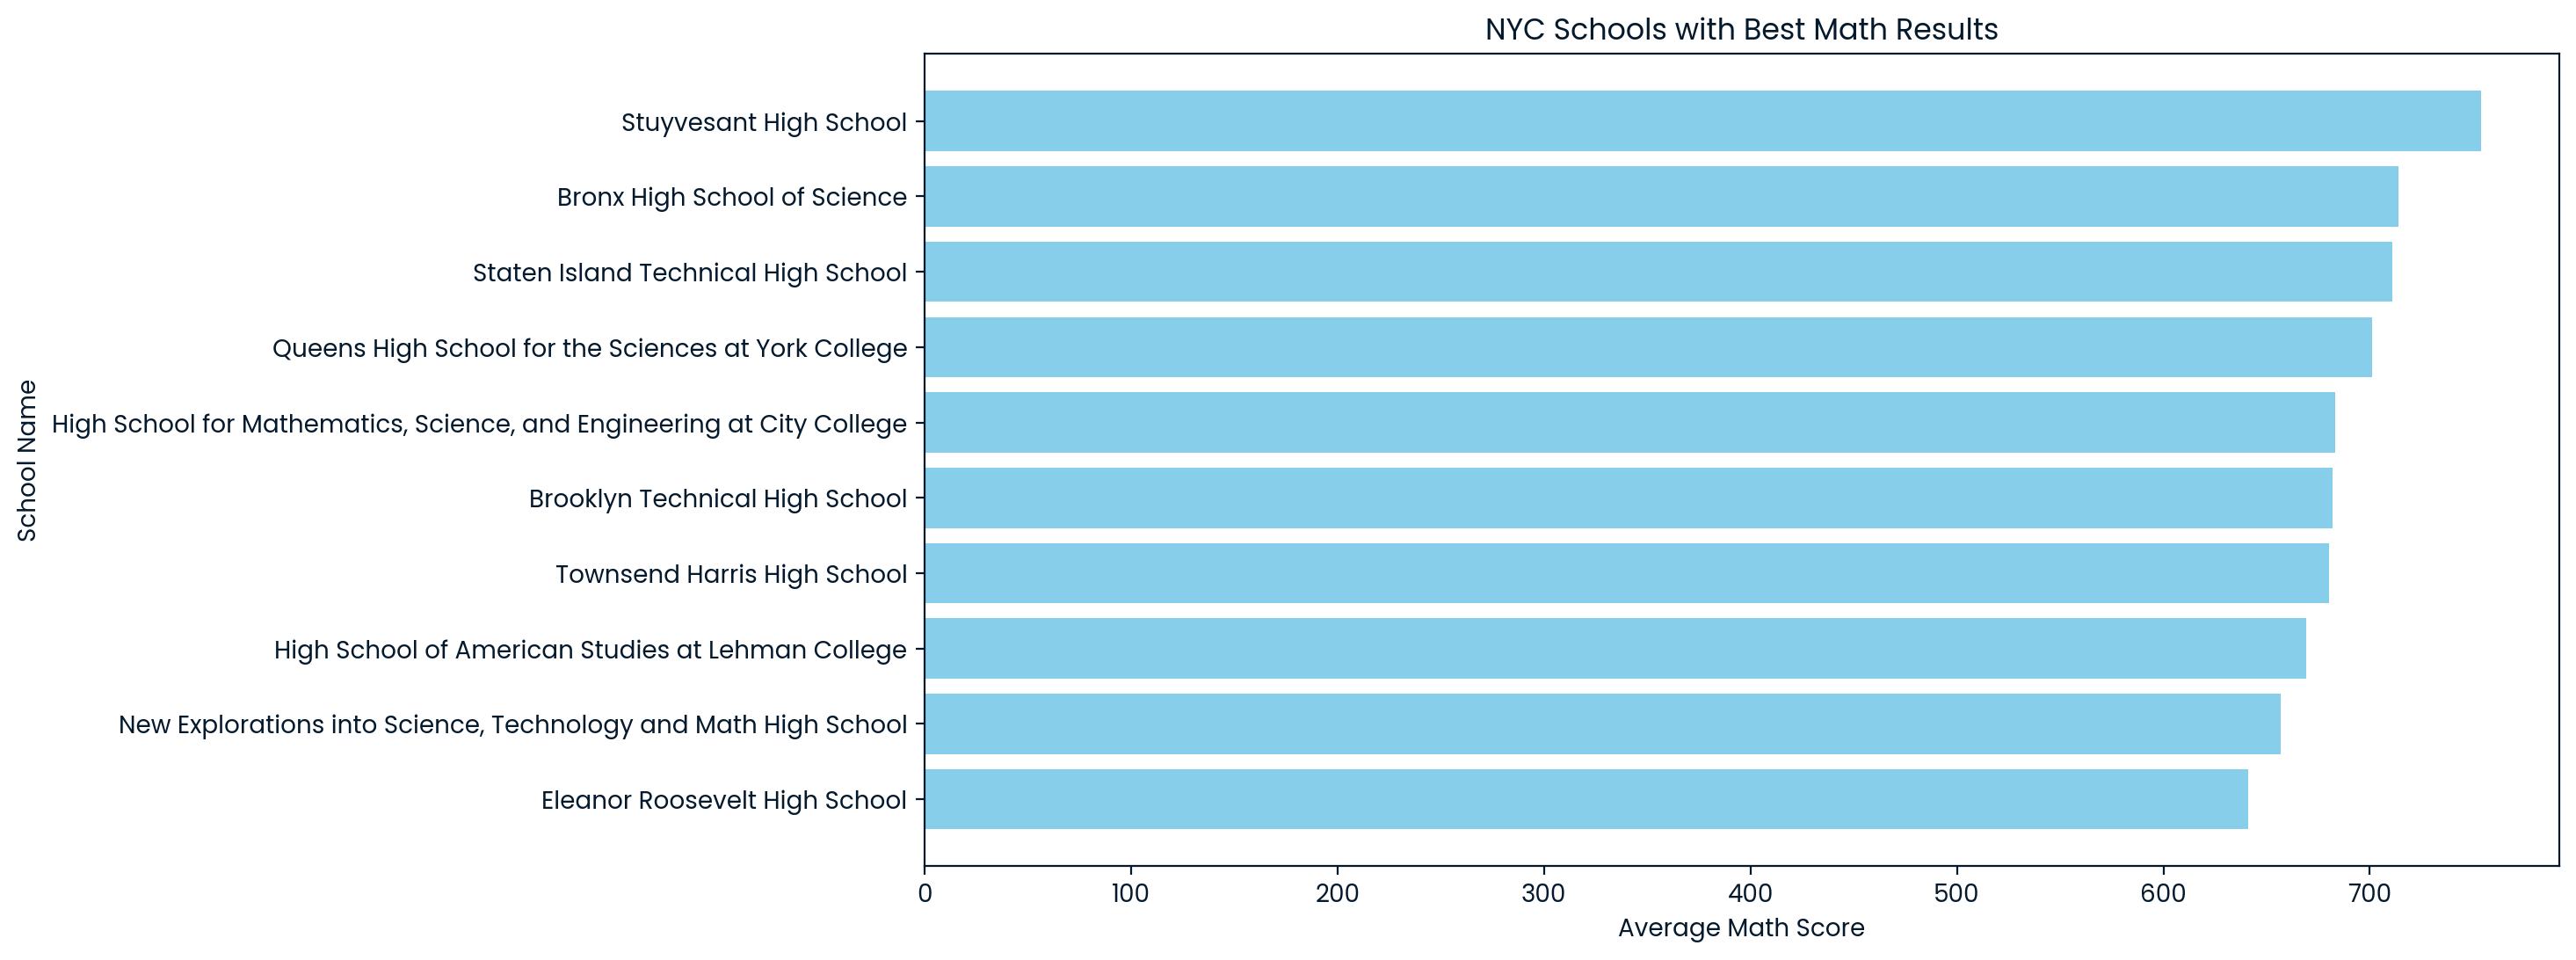

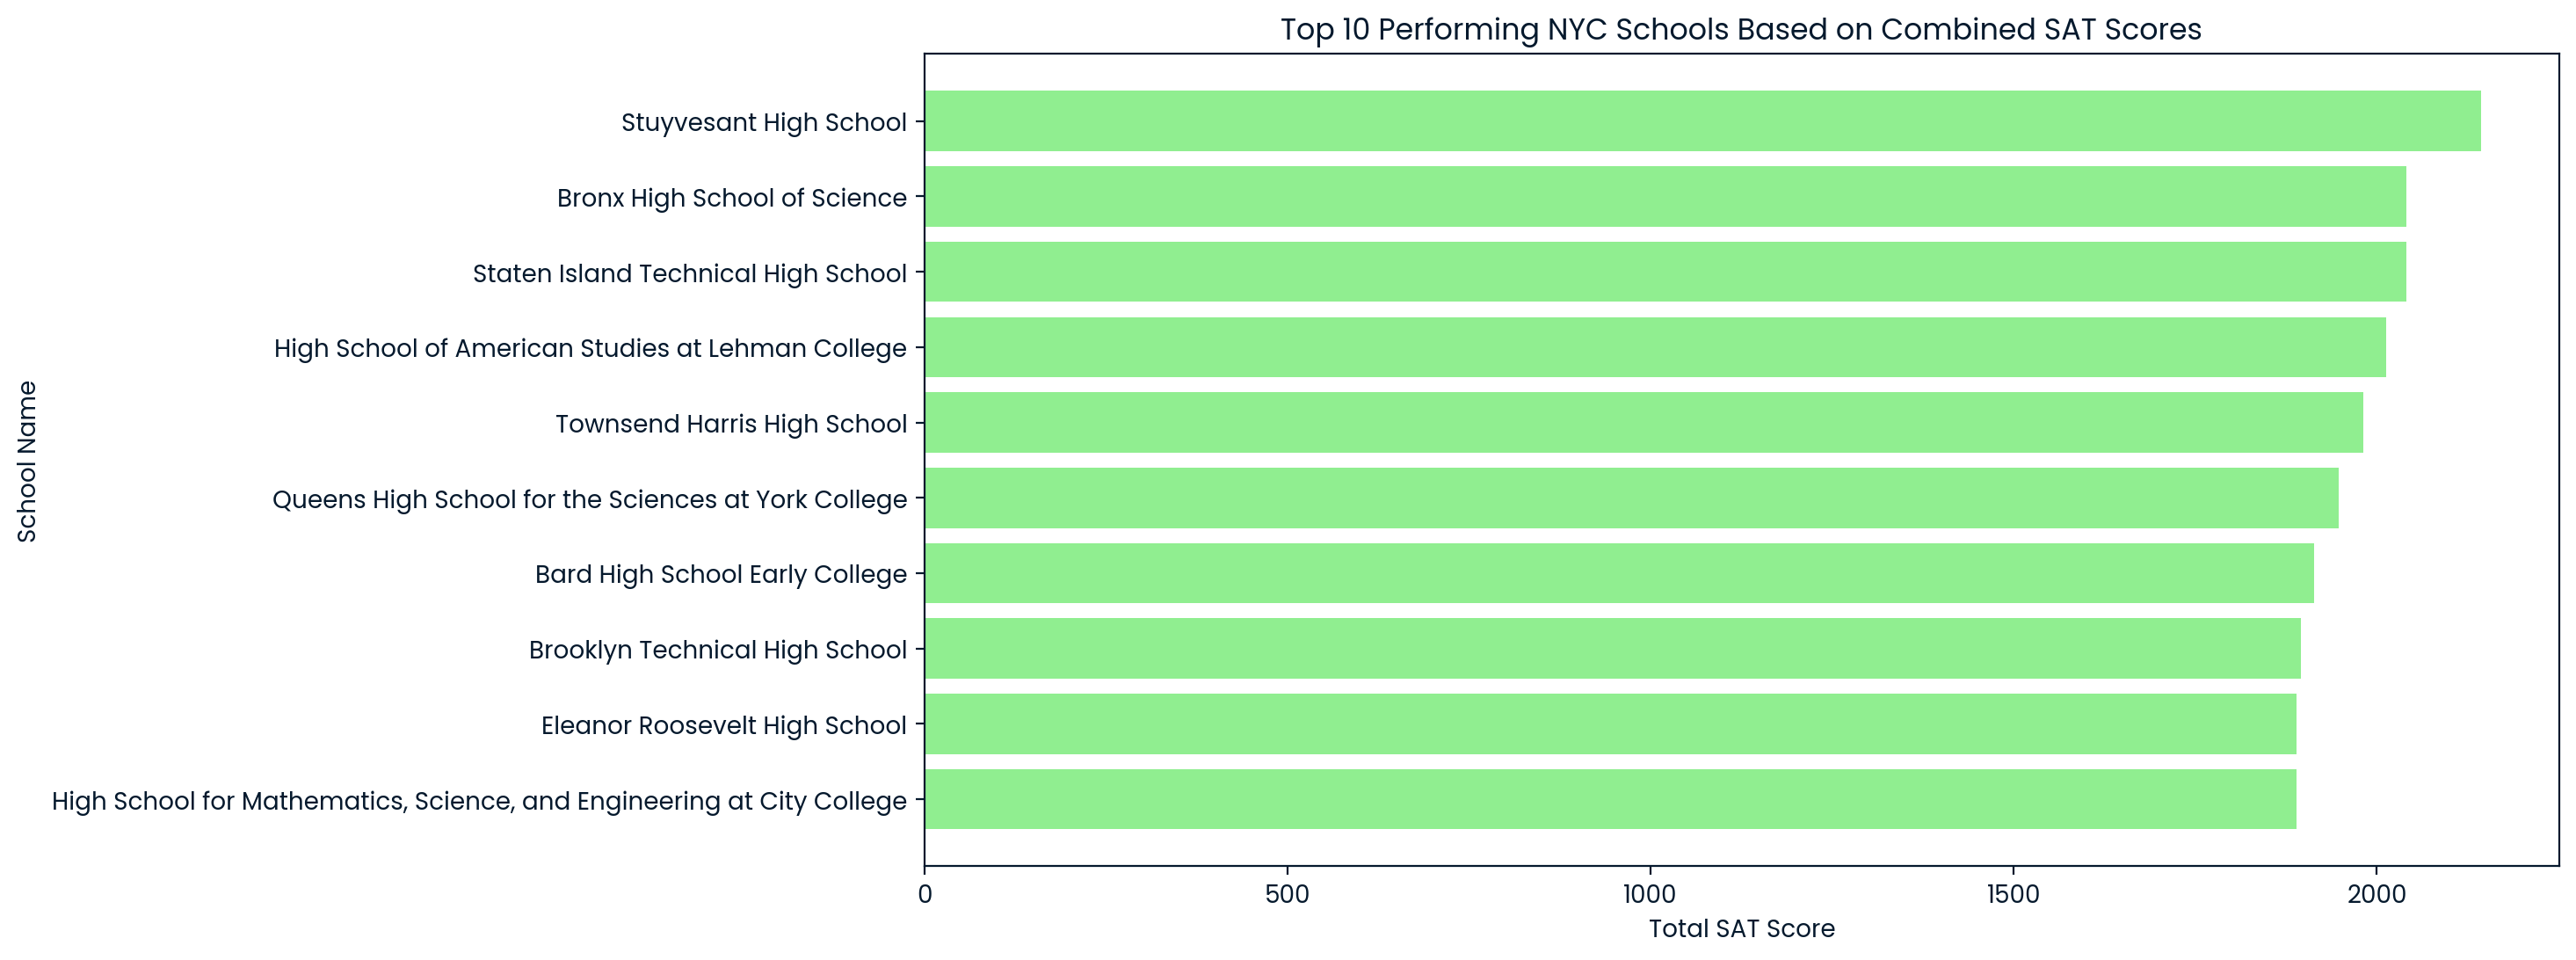

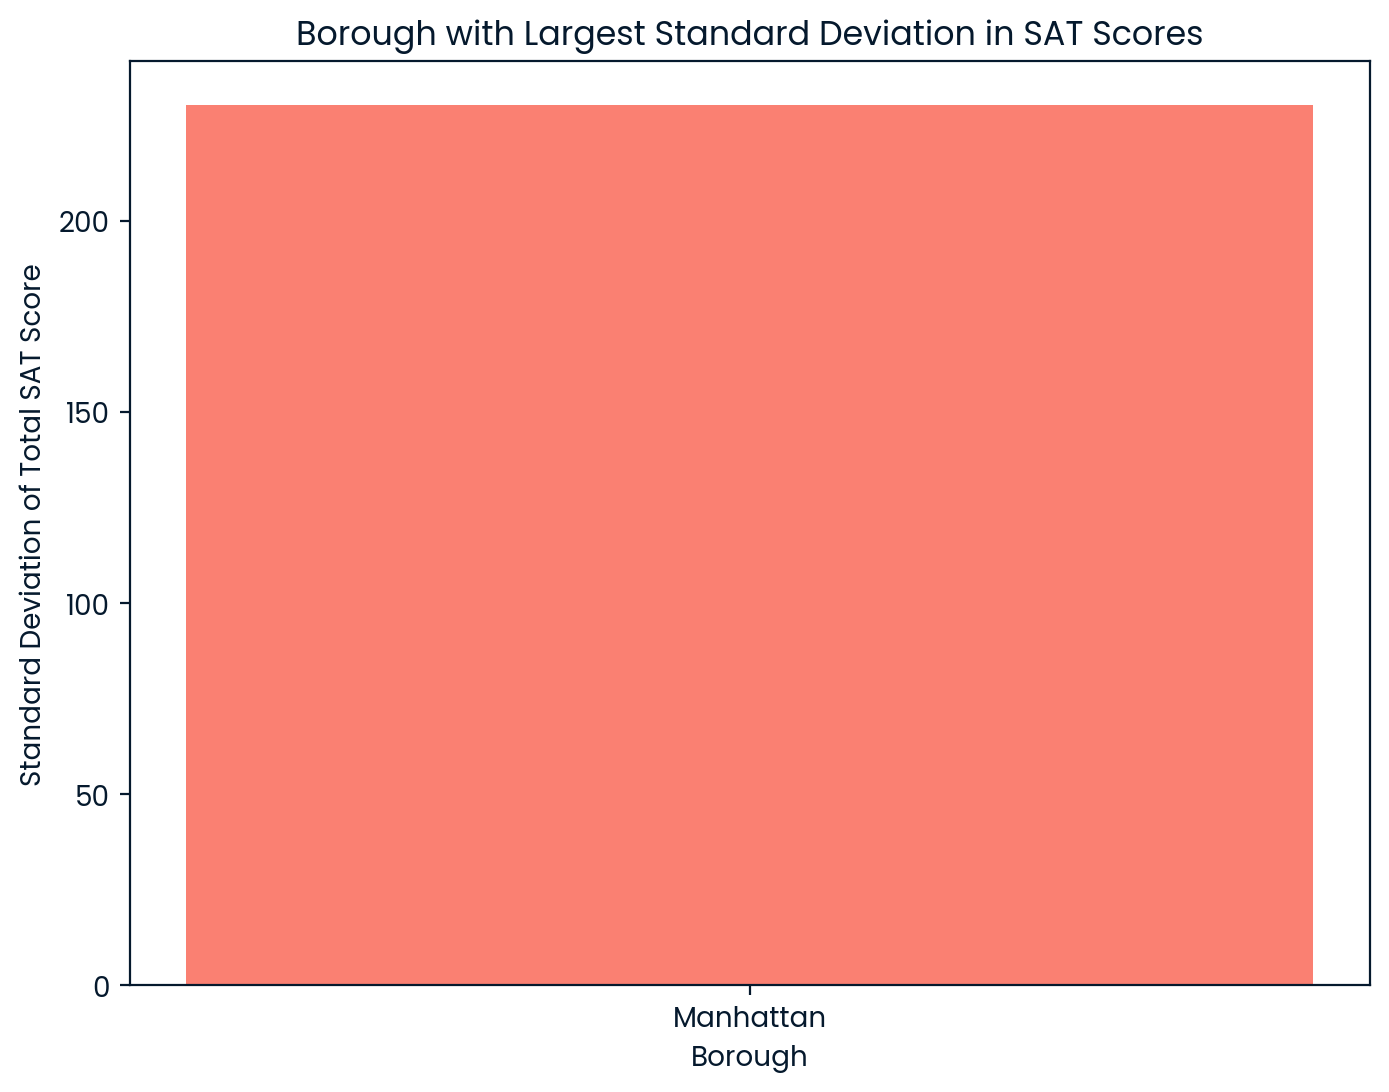

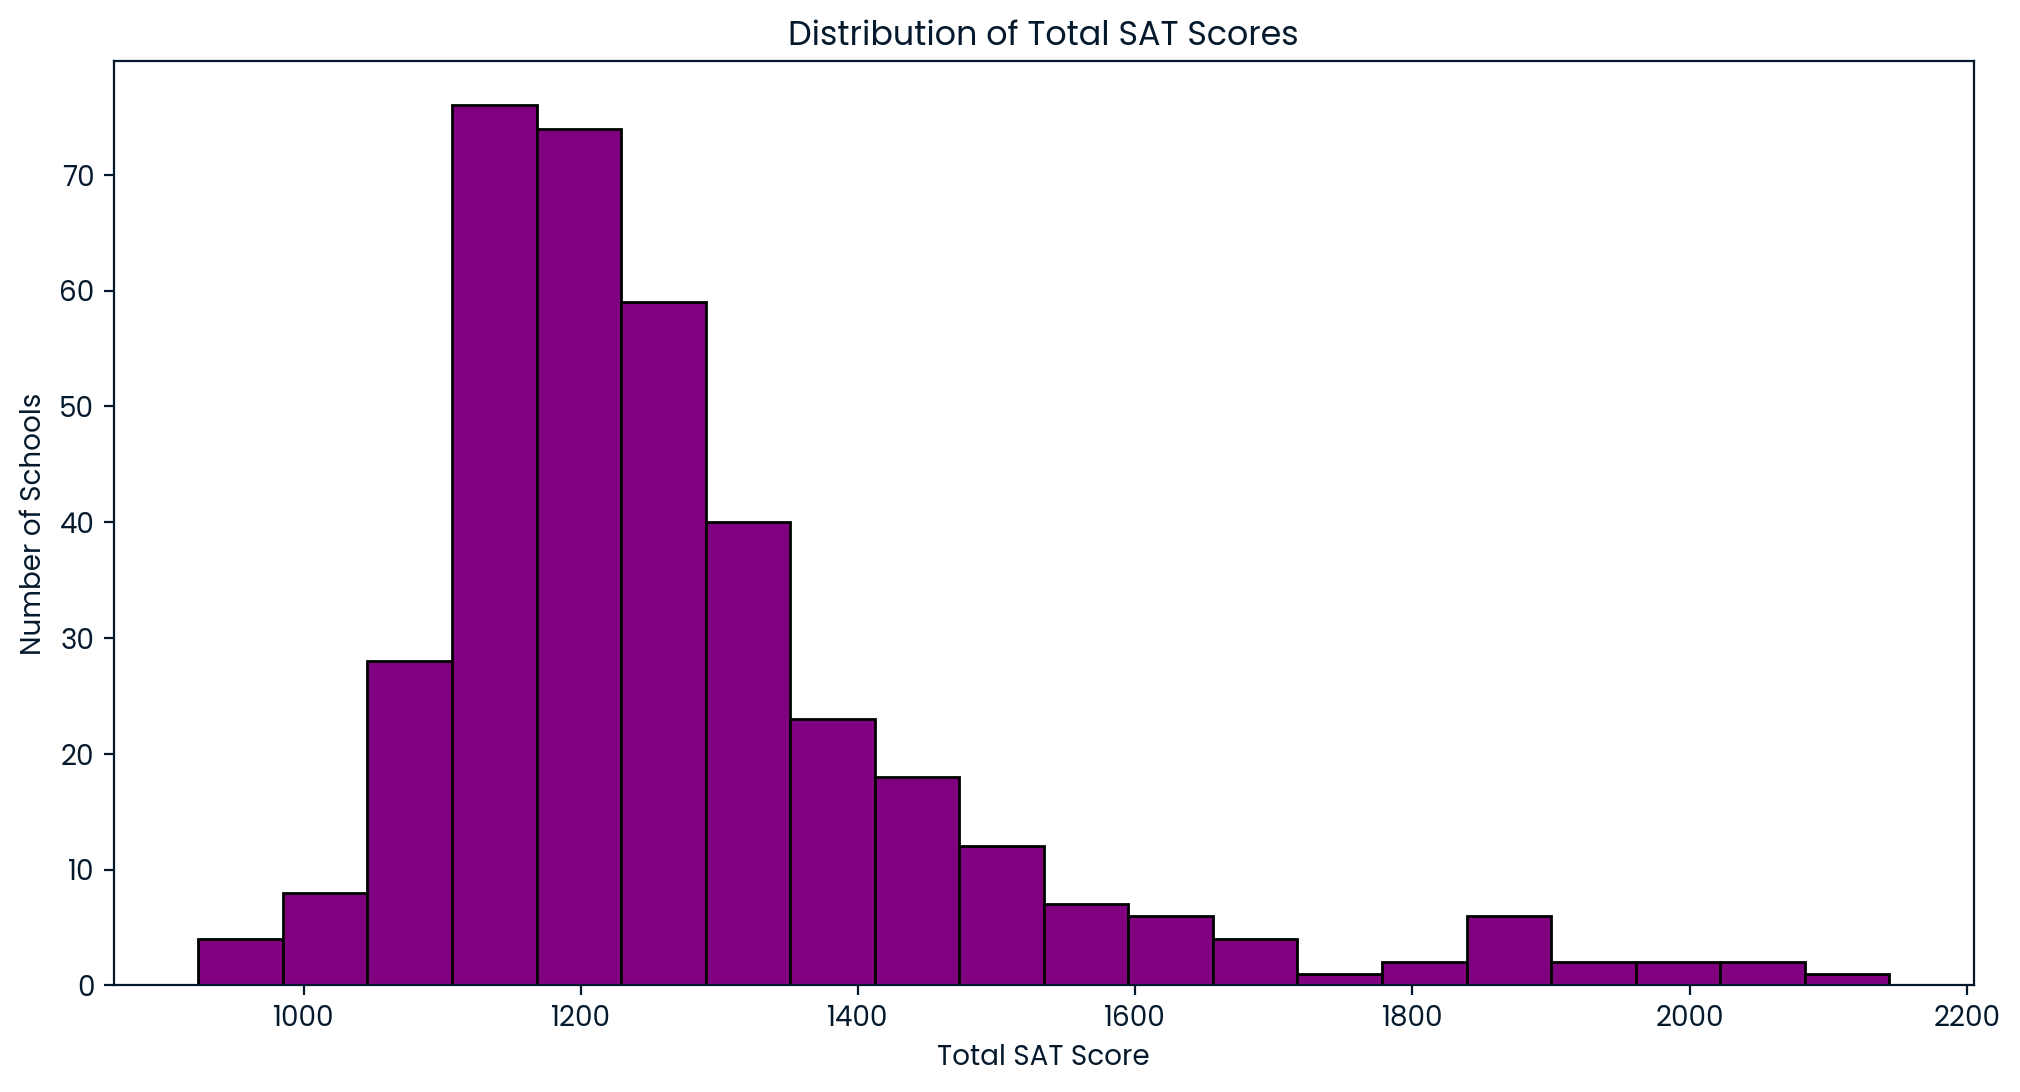

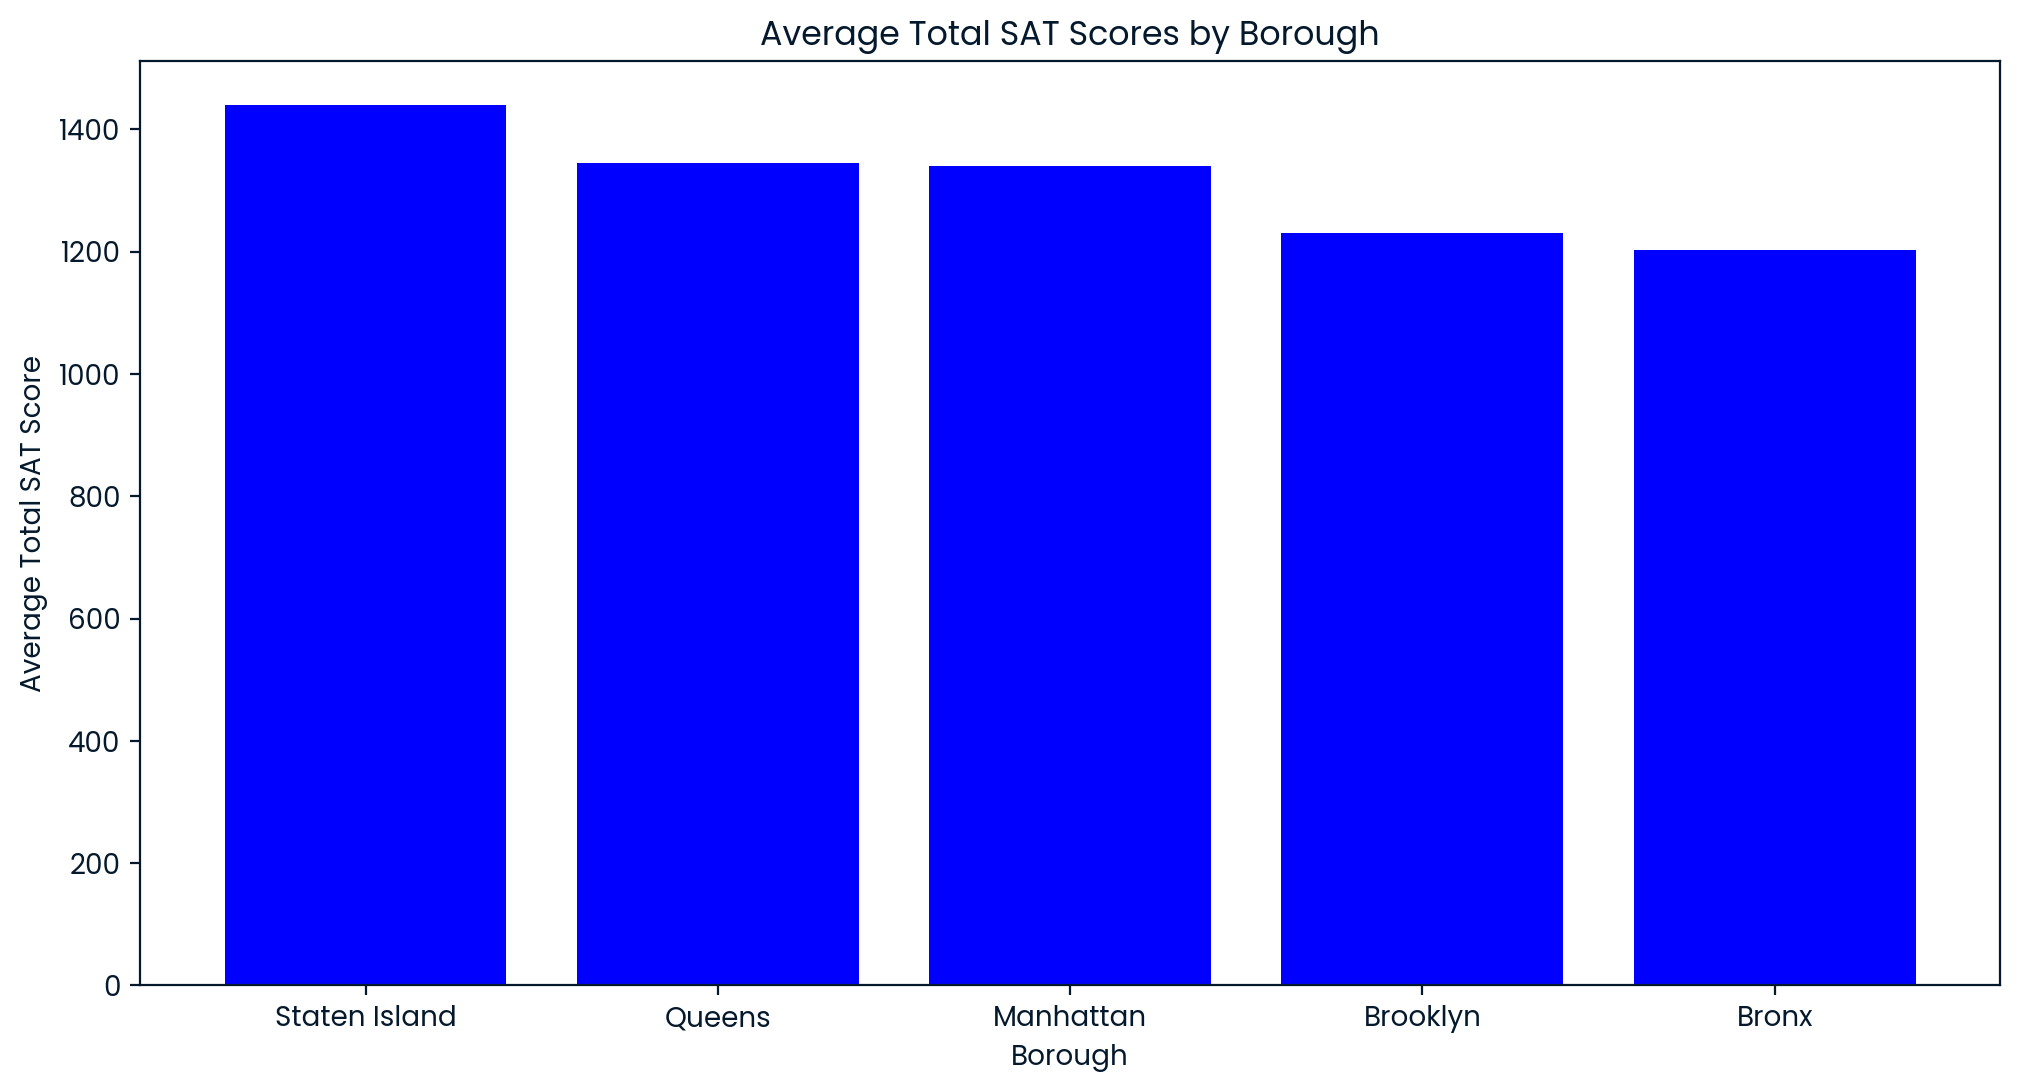

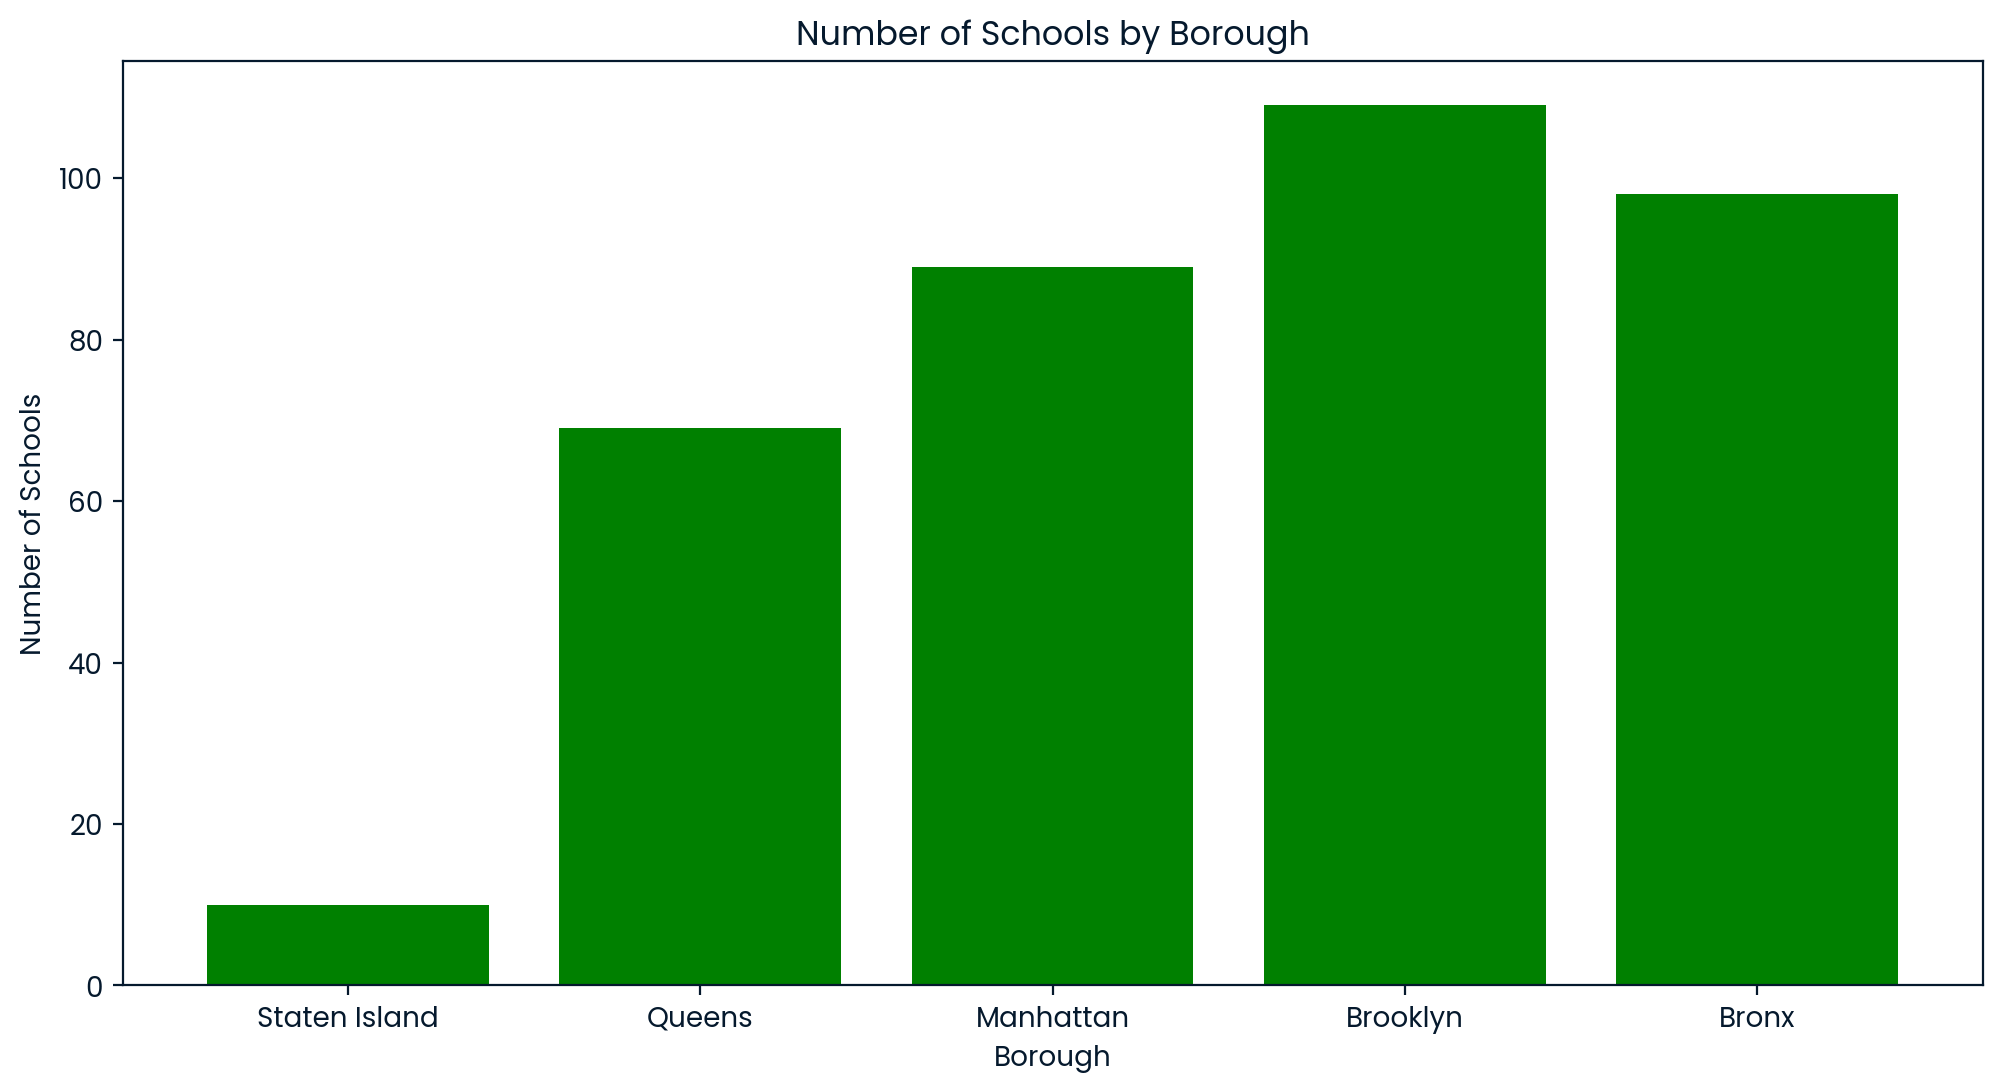

Best Math Schools:
                                            school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
Top 10 Performing Schools:
                                            school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       

In [20]:
# 1. Which schools are best for math?
best_math_schools = schools[schools['average_math'] >= 0.8 * 800][['school_name', 'average_math']].sort_values('average_math', ascending=False)

# 2. Calculate total_SAT per school
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

# 3. Who are the top 10 performing schools?
top_10_schools = schools.sort_values('total_SAT', ascending=False)[['school_name', 'total_SAT']].head(10)

# 4. Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

# 5. Filter for max std and make borough a column
largest_std_dev = boroughs[boroughs['std'] == boroughs['std'].max()]

# 6. Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={'count': 'num_schools', 'mean': 'average_SAT', 'std': 'std_SAT'})

# 7. Move borough from index to column
largest_std_dev.reset_index(inplace=True)

# Borough trends analysis
borough_avg = schools.groupby('borough')['total_SAT'].mean().sort_values(ascending=False).reset_index()
borough_avg.columns = ['borough', 'average_total_SAT']

borough_school_count = schools['borough'].value_counts().reset_index()
borough_school_count.columns = ['borough', 'num_schools']

borough_analysis = pd.merge(borough_avg, borough_school_count, on='borough')

# Additional SAT performance insights
best_reading_schools = schools.sort_values('average_reading', ascending=False).head(10)[['school_name', 'average_reading']]
best_writing_schools = schools.sort_values('average_writing', ascending=False).head(10)[['school_name', 'average_writing']]
lowest_sat_schools = schools.sort_values('total_SAT').head(10)[['school_name', 'total_SAT']]

# Visualization for Best Math Schools
plt.figure(figsize=(12, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='skyblue')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('NYC Schools with Best Math Results')
plt.gca().invert_yaxis()
plt.show()

# Visualization for Top 10 Performing Schools
plt.figure(figsize=(12, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='lightgreen')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.title('Top 10 Performing NYC Schools Based on Combined SAT Scores')
plt.gca().invert_yaxis()
plt.show()

# Visualization for Borough with Largest Standard Deviation in SAT Scores
plt.figure(figsize=(8, 6))
plt.bar(largest_std_dev['borough'], largest_std_dev['std_SAT'], color='salmon')
plt.xlabel('Borough')
plt.ylabel('Standard Deviation of Total SAT Score')
plt.title('Borough with Largest Standard Deviation in SAT Scores')
plt.show()

# Visualization of Distribution of SAT Scores
plt.figure(figsize=(12, 6))
plt.hist(schools['total_SAT'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Total SAT Score')
plt.ylabel('Number of Schools')
plt.title('Distribution of Total SAT Scores')
plt.show()

# Visualization of SAT Scores by Borough
plt.figure(figsize=(12, 6))
plt.bar(borough_analysis['borough'], borough_analysis['average_total_SAT'], color='blue')
plt.xlabel('Borough')
plt.ylabel('Average Total SAT Score')
plt.title('Average Total SAT Scores by Borough')
plt.show()

# Visualization of Number of Schools by Borough
plt.figure(figsize=(12, 6))
plt.bar(borough_analysis['borough'], borough_analysis['num_schools'], color='green')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by Borough')
plt.show()

# Display the DataFrames for additional insights
print("Best Math Schools:\n", best_math_schools)
print("Top 10 Performing Schools:\n", top_10_schools)
print("Borough with Largest Standard Deviation in SAT Scores:\n", largest_std_dev)
print("Borough Analysis:\n", borough_analysis)
print("Best Reading Schools:\n", best_reading_schools)
print("Best Writing Schools:\n", best_writing_schools)
print("Lowest SAT Schools:\n", lowest_sat_schools)
